In [2]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 17.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 18.0 MB/s eta 0:00:0000:0100:01


In [2]:
import os
import time
import uuid # universally unique identifier
import cv2

In [9]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [13]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [16]:
!brew install pyqt

Running `brew update --auto-update`...
==> homebrew/core is old and unneeded, untapping to save space...
Untapping homebrew/core...
Untapped 3 commands and 6987 formulae (7,388 files, 741.8MB).
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
c3c                        libnsbmp                   ruby@3.2
cargo-llvm-cov             libnsgif                   scnlib
chisel-tunnel              libspelling                senpai
csvlens                    libwapcaplet               steamguard-cli
deadfinder                 limesuite                  sugarjar
direwolf                   mtm                        terrapin-scanner
doltgres                   ncmdump                    texi2mdoc
dotter                     netsurf-buildsystem        tfautomv
flowpipe                   nowplaying-cli             tomlplusplus
git-grab                   openjph                    urlscan
halp                       opensca-cli                veilid
helm-ls

In [22]:
!pip3 install pyqt5 --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.4/144.4 kB 11.8 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [24]:
# !pip install labelme
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: /Users/sarthak/.labelmerc
2024-02-03 19:28:46.634 Python[56370:1949313] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
qt.qpa.window: Window position QRect(-109,202 955x459) outside any known screen, using primary screen


In [3]:
import json 
import numpy as np
from matplotlib import pyplot as plt 

In [59]:
!pip install tensorflow==2.10.0 --force-reinstall

ERROR: Could not find a version that satisfies the requirement tensorflow==2.10.0 (from versions: 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==2.10.0


In [4]:
import tensorflow as tf

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))

Num of GPUs available:  0


In [6]:
tf.test

<module 'tensorflow._api.v2.test' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/_api/v2/test/__init__.py'>

In [7]:
print(tf.__version__)

2.15.0


In [39]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

ModuleNotFoundError: No module named 'tensorflow.compat'

In [29]:
images = tf.data.Dataset.list_files('/Users/sarthak/FaceDetection/data/images/*.jpg')

In [30]:
images.as_numpy_iterator().next()
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img
    
images = images.map(load_image)
images.as_numpy_iterator().next()
type(images)

tensorflow.python.data.ops.map_op._MapDataset

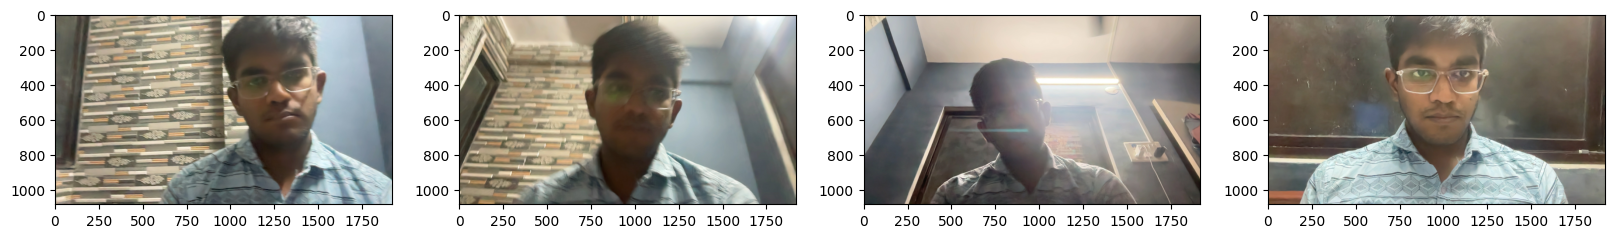

In [31]:
image_generator = images.batch(4).as_numpy_iterator()
plot_images = image_generator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [34]:
for folder in ['train','test','valid']:
    for file in os.listdir(os.path.join('/Users/sarthak/FaceDetection/data', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('/Users/sarthak/FaceDetection/data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('/Users/sarthak/FaceDetection/data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

In [35]:
import albumentations as alb


In [49]:
augmentor = alb.Compose([alb.RandomCrop(width=900, height=900), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [50]:
img = cv2.imread(os.path.join('/Users/sarthak/FaceDetection/data','train', 'images','3c92b0a2-c299-11ee-9579-fa48f5570f40.jpg'))
with open(os.path.join('/Users/sarthak/FaceDetection/data', 'train', 'labels', '3c92b0a2-c299-11ee-9579-fa48f5570f40.json'), 'r') as f:
    label = json.load(f)
label['shapes'][0]['points']

[[655.4545454545455, 42.727272727272734],
 [1357.272727272727, 909.9999999999999]]

In [51]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords

[655.4545454545455, 42.727272727272734, 1357.272727272727, 909.9999999999999]

In [52]:
img.shape

(1080, 1920, 3)

In [53]:
coords = list(np.divide(coords, [1920,1080,1920,1080]))
coords

[0.3413825757575758,
 0.03956228956228957,
 0.7069128787878787,
 0.8425925925925924]

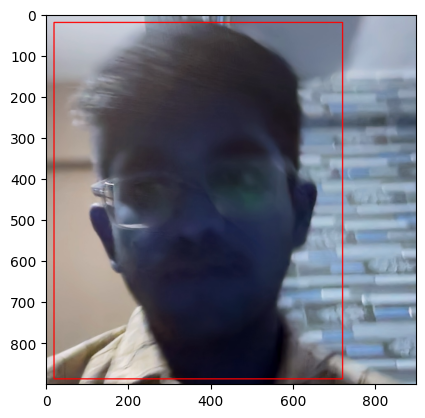

In [54]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
augmented['bboxes'][0][2:]
augmented['bboxes']
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [900,900]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [900,900]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [60]:
for partition in ['train','test','valid']: 
    for image in os.listdir(os.path.join('/Users/sarthak/FaceDetection/data', partition, 'images')):
        img = cv2.imread(os.path.join('/Users/sarthak/FaceDetection/data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('/Users/sarthak/FaceDetection/data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [1920,1080,1920,1080]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('/Users/sarthak/FaceDetection/aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('/Users/sarthak/FaceDetection/aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.6548295454545453, 0.5479797979797979, 0.33857314109301107, 0.0, 'face'].
image must be numpy array type
image must be numpy array type
x_max is less than or equal to x_min for bbox [0.7012310606060606, 0.6523569023569024, 0.3115729541704171, 0.0, 'face'].
x_max is less than or equal to x_min for bbox [0.6491477272727272, 0.5513468013468013, 0.3362706154465004, 0.0, 'face'].


In [61]:
train_images = tf.data.Dataset.list_files('/Users/sarthak/FaceDetection/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [62]:
test_images = tf.data.Dataset.list_files('/Users/sarthak/FaceDetection/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [63]:
val_images = tf.data.Dataset.list_files('/Users/sarthak/FaceDetection/aug_data/valid/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [64]:
train_images.as_numpy_iterator().next()

array([[[0.09019608, 0.1254902 , 0.10588235],
        [0.08799019, 0.12328431, 0.10367647],
        [0.08627451, 0.12156863, 0.10196079],
        ...,
        [0.09019608, 0.13333334, 0.10980392],
        [0.09093137, 0.13406862, 0.11053921],
        [0.09044117, 0.13357843, 0.11004902]],

       [[0.08946078, 0.1247549 , 0.10514706],
        [0.08799019, 0.12328431, 0.10367647],
        [0.09019608, 0.1254902 , 0.10588235],
        ...,
        [0.08921569, 0.13235295, 0.10882353],
        [0.09019608, 0.13333334, 0.10980392],
        [0.08946078, 0.13259804, 0.10906862]],

       [[0.08946078, 0.1247549 , 0.10514706],
        [0.09019608, 0.1254902 , 0.10588235],
        [0.08921569, 0.1245098 , 0.10490196],
        ...,
        [0.09019608, 0.13333334, 0.10980392],
        [0.09019608, 0.13333334, 0.10980392],
        [0.09117647, 0.13431373, 0.11078431]],

       ...,

       [[0.09019608, 0.1254902 , 0.10588235],
        [0.09019608, 0.1254902 , 0.10588235],
        [0.09019608, 0

In [65]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [66]:
train_labels = tf.data.Dataset.list_files('/Users/sarthak/FaceDetection/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

test_labels = tf.data.Dataset.list_files('/Users/sarthak/FaceDetection/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

val_labels = tf.data.Dataset.list_files('/Users/sarthak/FaceDetection/aug_data/valid/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [67]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)


(3720, 3720, 960, 960, 540, 540)

In [68]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [70]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - img marked as output argument, but provided NumPy array marked as readonly
>  - Expected Ptr<cv::UMat> for argument 'img'


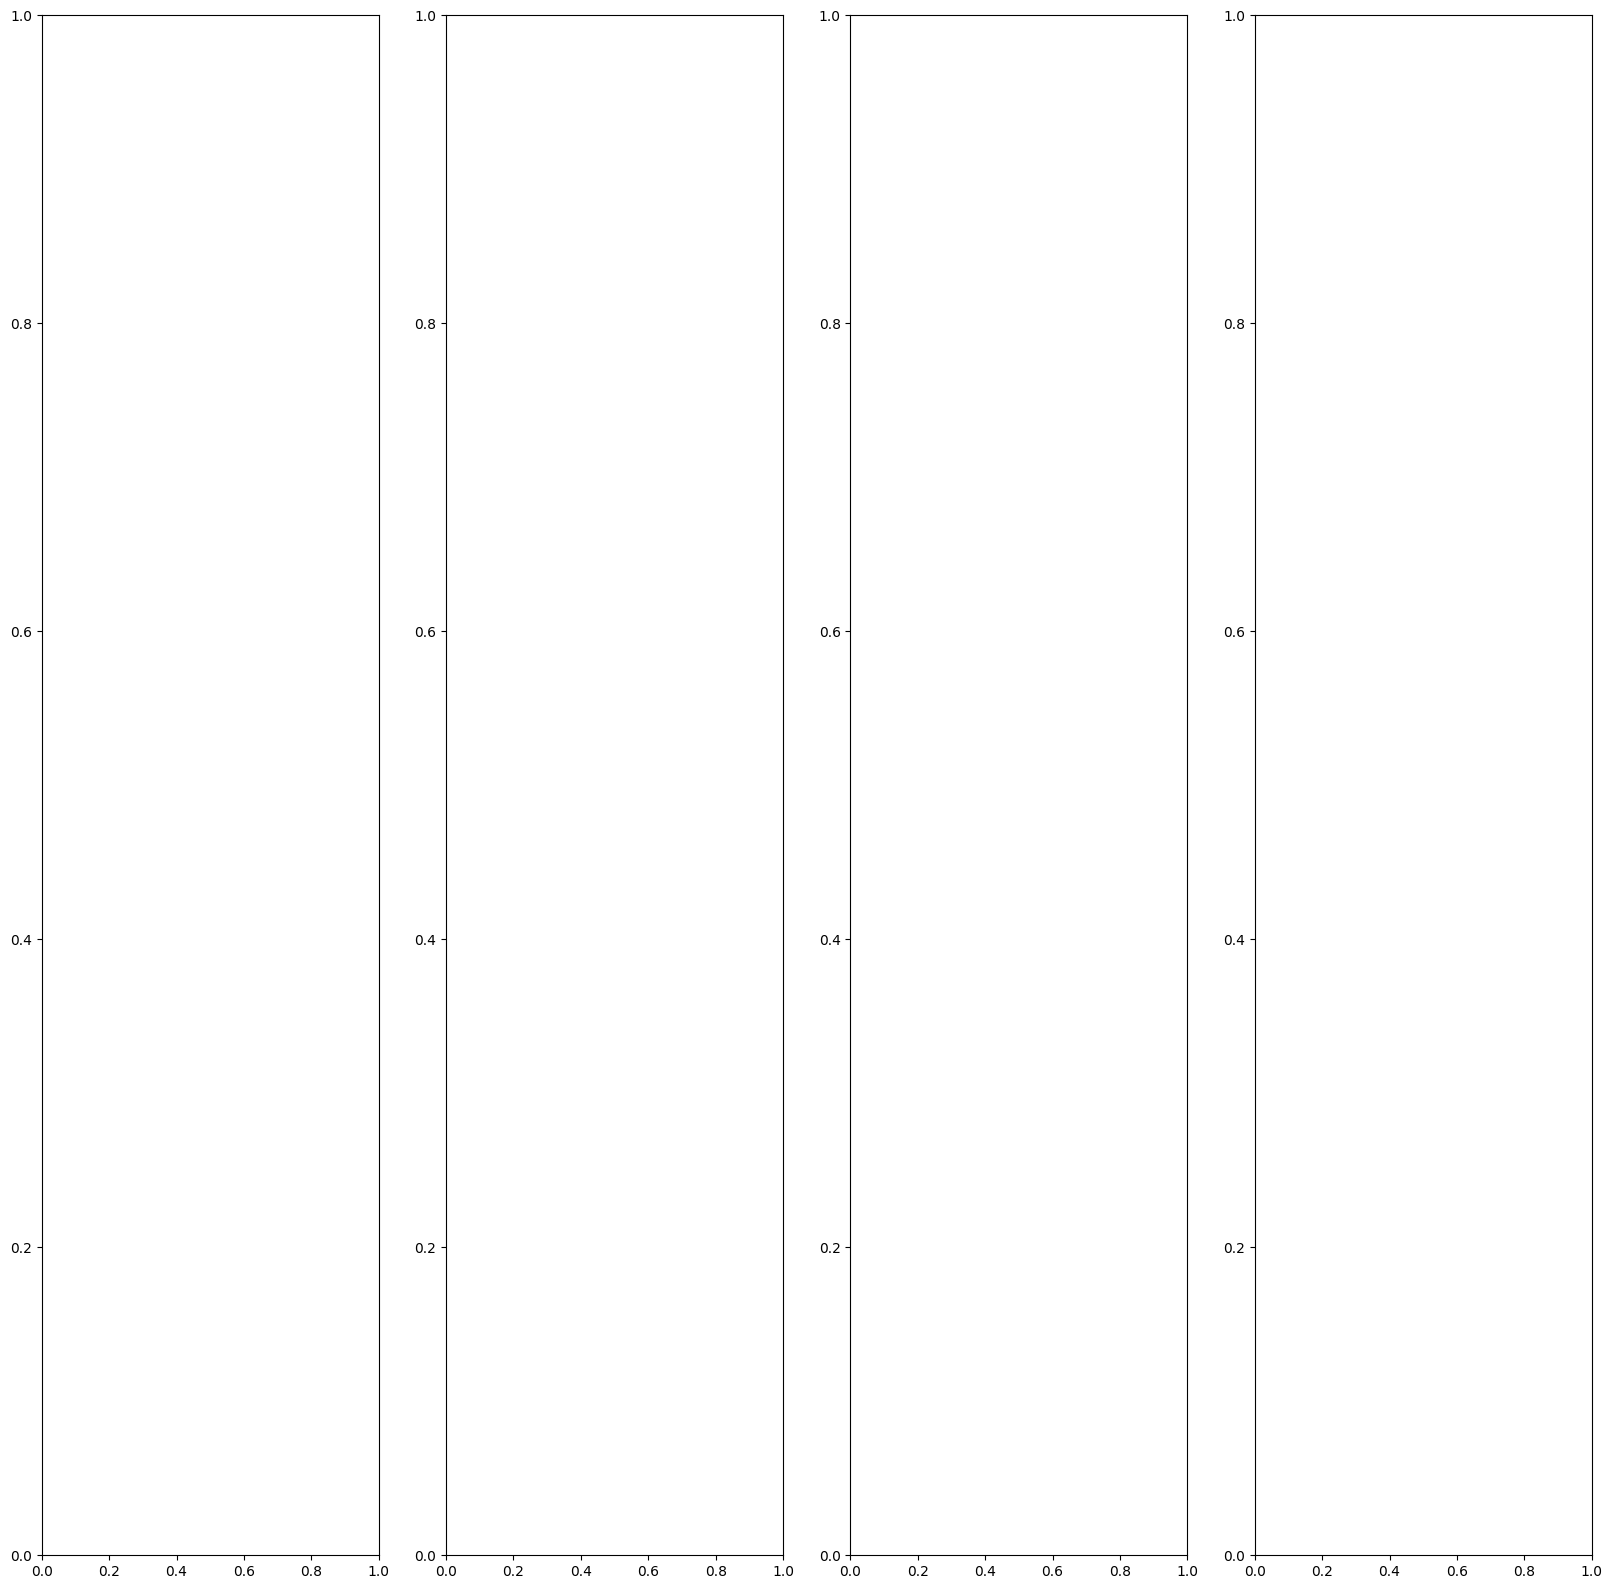

In [90]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    # cv2.rectangle(sample_image, 
    #               tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
    #               tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
    #                     (255,0,0), 2)
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [1920,1080]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [1920,1080]).astype(int)),
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [76]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [77]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [78]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [79]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [80]:
facetracker = build_model()
facetracker.summary()
X, y = train.as_numpy_iterator().next()
classes, coords = facetracker.predict(X)
classes, coords

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_4[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

(array([[0.4719562 ],
        [0.45054507],
        [0.44342926],
        [0.47417226],
        [0.47922996],
        [0.48222864],
        [0.5152317 ],
        [0.52010554]], dtype=float32),
 array([[0.47257584, 0.6047149 , 0.5251112 , 0.5055908 ],
        [0.5191674 , 0.6143482 , 0.5400178 , 0.5333784 ],
        [0.4778973 , 0.5890264 , 0.5790623 , 0.54855454],
        [0.543522  , 0.49243003, 0.6402447 , 0.4876164 ],
        [0.574395  , 0.5680364 , 0.656031  , 0.5961072 ],
        [0.59613967, 0.5157034 , 0.611235  , 0.51093227],
        [0.531649  , 0.47075433, 0.6057634 , 0.503565  ],
        [0.5795618 , 0.46316278, 0.5256846 , 0.5285201 ]], dtype=float32))

In [82]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [83]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [84]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [85]:
model = FaceTracker(facetracker)
model.compile(opt, classloss, regressloss)

In [86]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
465/465 [==============================] - 417s 884ms/step - total_loss: 0.5377 - class_loss: 0.0943 - regress_loss: 0.4905 - val_total_loss: 0.4768 - val_class_loss: 0.2275 - val_regress_loss: 0.3631
Epoch 2/10
465/465 [==============================] - 452s 962ms/step - total_loss: 0.1543 - class_loss: 0.0200 - regress_loss: 0.1443 - val_total_loss: 0.0583 - val_class_loss: 1.3262e-06 - val_regress_loss: 0.0583
Epoch 3/10
465/465 [==============================] - 508s 1s/step - total_loss: 0.0479 - class_loss: 0.0023 - regress_loss: 0.0467 - val_total_loss: 0.0152 - val_class_loss: 8.5236e-06 - val_regress_loss: 0.0152
Epoch 4/10
465/465 [==============================] - 490s 1s/step - total_loss: 0.0261 - class_loss: 2.5377e-04 - regress_loss: 0.0260 - val_total_loss: 0.0195 - val_class_loss: 4.4257e-06 - val_regress_loss: 0.0195
Epoch 5/10
465/465 [==============================] - 500s 1s/step - total_loss: 0.0172 - class_loss: 9.4089e-05 - regress_loss: 0.0172 - val_

In [87]:
hist.history

{'total_loss': [0.7931337356567383,
  0.0569673590362072,
  0.037849802523851395,
  0.009610067121684551,
  0.022683747112751007,
  0.004363881889730692,
  0.008887015283107758,
  0.0022490250412374735,
  0.008492724969983101,
  0.009511873126029968],
 'class_loss': [0.08943650126457214,
  3.471463423920795e-05,
  7.297781849047169e-05,
  3.381337592145428e-05,
  0.00030518503626808524,
  4.604475634550909e-06,
  3.442187335167546e-06,
  4.246867320034653e-06,
  2.724819387367461e-05,
  4.496933252085e-05],
 'regress_loss': [0.748415470123291,
  0.056950002908706665,
  0.03781331330537796,
  0.009593160822987556,
  0.02253115549683571,
  0.0043615796603262424,
  0.008885294198989868,
  0.00224690162576735,
  0.008479100652039051,
  0.009489388205111027],
 'val_total_loss': [0.4768131971359253,
  0.058297500014305115,
  0.015205450356006622,
  0.01954529993236065,
  0.01046440564095974,
  0.02344769984483719,
  0.02206898108124733,
  0.044133469462394714,
  0.006356265861541033,
  0.022

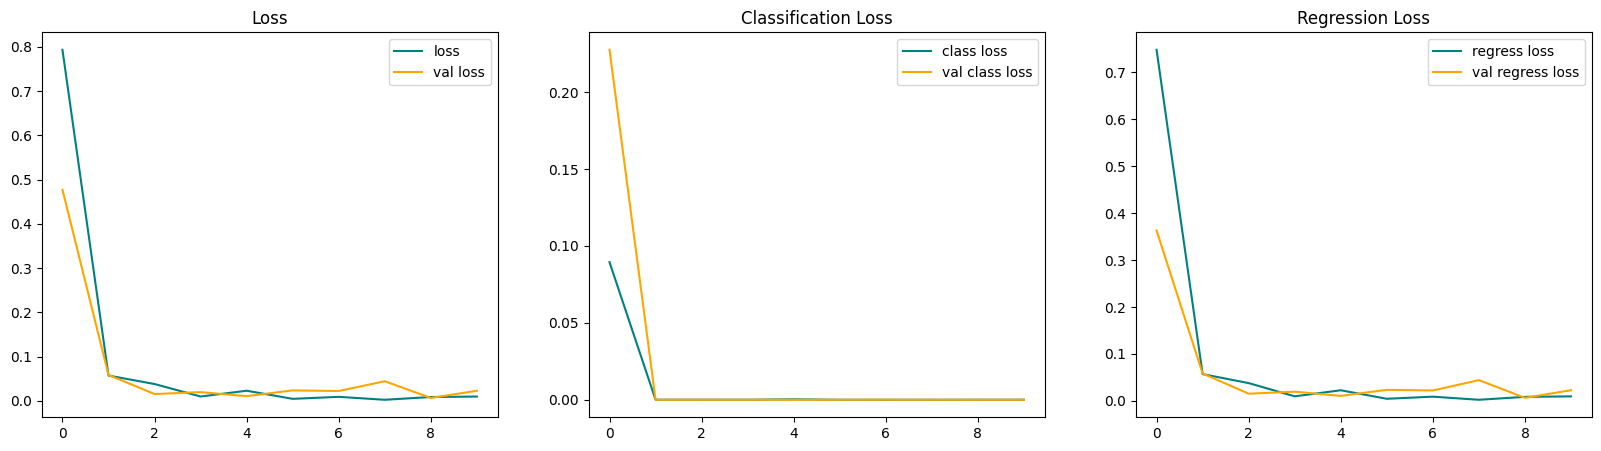

In [88]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [91]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 356ms/step


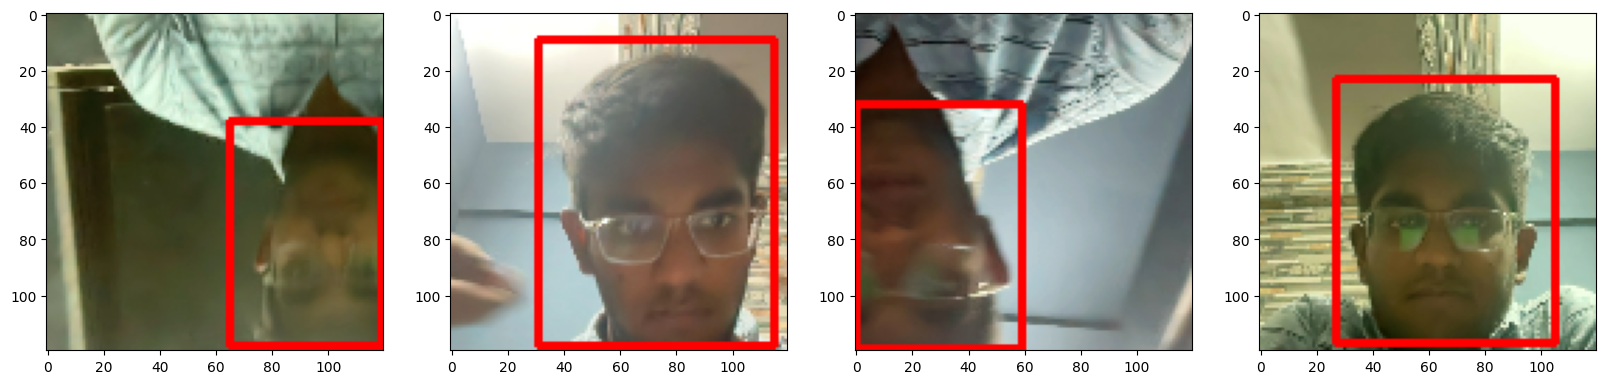

In [99]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_image = np.array(sample_image)
    sample_coords = yhat[1][idx]
    # print(tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)))
    # print(tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)))
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [9]:
from tensorflow.keras.models import load_model
# facetracker.save('facetracker.h5')


In [6]:
ls

Untitled.ipynb   aug_data/        facetracker.h5
Untitled1.ipynb  data/


In [10]:
facetracker = load_model('/Users/sarthak/FaceDetection/facetracker.h5')

In [14]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[100:1000, 100:1000,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [1920,1080]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [1920,1080]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [1920,1080]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [1920,1080]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [1920,1080]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 39ms/step
